In [4]:
# Import libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from lime import lime_tabular

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train a Logistic Regression model
model = LogisticRegression(random_state=0)
model.fit(X, y)

/Users/markusmacbookair/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [7]:
X.shape

(150, 4)

In [8]:
# Explanation for a specific data point (index 0)
explainer = lime_tabular.LimeTabularExplainer(X, feature_names=iris.feature_names, class_names=["iris-setosa", "iris-versicolor", "iris-virginica"])

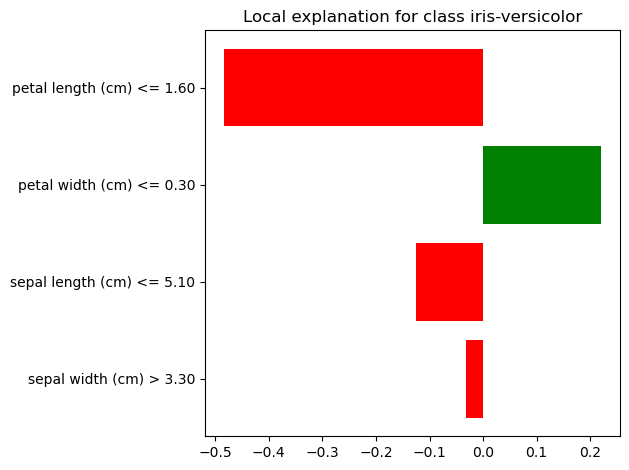

In [13]:
# Define a function to predict with the model
def predict_fn(x):
  return model.predict_proba(x.reshape(1, -1))[:, 1]


explanation = explainer.explain_instance(X[0], model.predict_proba)

# Print the explanation
explanation.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()